## Project 2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import Image

%matplotlib inline

from scipy import ndimage
import imageio
import skimage
from skimage import data, img_as_float
from skimage import exposure
from skimage.color import rgb2hsv
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank, unsharp_mask
from skimage.transform import PiecewiseAffineTransform, warp


In [2]:
#Convolution function with padding function separate
#pad is value of padding and is initialized to zero
#kernel_rows
#kernel_cols

def padding(input_image, pad = 0, w_r = 0, w_c = 0):
    '''
    Takes input image and kernel dimensions and the pad type(takes in integer values 0,1,2,3)
    and returns padded image as output.
    For even kernel dimensions such as 2x2, the bottom right pixel is considered as the center.
    
    pad = 0 -> zero padding
    pad = 1 -> wrap around
    pad = 2 -> copy edge
    pad = 3 -> reflect across edge
    '''
    

    
    #individual padding values for rows
    top_row_pad_value = int(np.ceil((w_r-1)/2))
    bottom_row_pad_value = int(np.floor((w_r-1)/2))
    
    #individual padding values for cols
    left_col_pad_value = int(np.ceil((w_c-1)/2))
    right_col_pad_value = int(np.floor((w_c-1)/2))
    
    if pad == 0:  #zero padding
        
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)
        
        
        padded_image = np.zeros(padded_dims)
        print("Dimensions of the padded image:", padded_image.shape)
        
        #Fitting the original image to the padded image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image
        
    elif pad == 1:   #wrap around
        
       
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)
        
        
        padded_image = np.zeros(padded_dims)
        print("Dimensions of the padded image:", padded_image.shape)
        
        #Fitting the original image to the padded image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image
        
        
        #upper most row padding
        if top_row_pad_value != 0:
            padded_image[0 : top_row_pad_value, : ] = padded_image[-1*(top_row_pad_value+bottom_row_pad_value)
                                                                   : top_row_pad_value + input_image.shape[0], : ]
        #lowest row padding
        if bottom_row_pad_value != 0:
            padded_image[-1*(bottom_row_pad_value) : , : ] = padded_image[top_row_pad_value
                                                                          : top_row_pad_value + bottom_row_pad_value, :]
        #right most column padding
        if right_col_pad_value != 0:
            padded_image[ : ,-1*(right_col_pad_value) : ] = padded_image[ : ,left_col_pad_value 
                                                                         : left_col_pad_value + right_col_pad_value]
        #left most column padding
        if left_col_pad_value != 0:
            padded_image[ : ,0 : left_col_pad_value] = padded_image[ : ,-1*(left_col_pad_value+right_col_pad_value)
                                                                    : left_col_pad_value + input_image.shape[1]]
    
    elif pad == 2:    #copy edge        
        
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)
        
        #print(padded_dims)
        padded_image = np.zeros(padded_dims)#.astype(int)
        print("Dimensions of the padded image:", padded_image.shape)
        
        #Fitting the original image to the padded image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image
        
        
        #upper most row padding
        if top_row_pad_value != 0:
            padded_image[0 : top_row_pad_value, : ] = padded_image[[top_row_pad_value], : ]
        #lowest row padding
        if bottom_row_pad_value != 0:
            padded_image[-1*(bottom_row_pad_value) : , : ] = padded_image[[-1*bottom_row_pad_value-1], :]
        #right most column padding
        if right_col_pad_value != 0:
            padded_image[ : ,-1*(right_col_pad_value) : ] = padded_image[ : ,[-1*(right_col_pad_value)-1]]
        #left most column padding
        if left_col_pad_value != 0:
            padded_image[ : ,0 : left_col_pad_value] = padded_image[ : ,[left_col_pad_value]]
            
    elif pad == 3:     #reflect across edge
    
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)

        
        padded_image = np.zeros(padded_dims)#.astype(int)
        print("Dimensions of the padded image:", padded_image.shape)

        #Fitting the original image to the padded image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image


        #upper most row padding
        if top_row_pad_value != 0:
            padded_image[0 : top_row_pad_value, : ] = np.flip(padded_image[top_row_pad_value 
                                                                           : 2*top_row_pad_value, :],axis = 0)
        #lowest row padding
        if bottom_row_pad_value != 0:
            padded_image[-1*(bottom_row_pad_value) : , : ] = np.flip(padded_image[-2*(bottom_row_pad_value)
                                                                                  : -1*(bottom_row_pad_value), : ], axis = 0)
        #right most column padding
        if right_col_pad_value != 0:
            padded_image[ : ,-1*(right_col_pad_value) : ] = np.flip(padded_image[ : ,-2*(right_col_pad_value)
                                                                                 : -1*(right_col_pad_value)], axis = 1)
        #left most column padding
        if left_col_pad_value != 0:
            padded_image[ : ,0 : left_col_pad_value] = np.flip(padded_image[ : ,left_col_pad_value
                                                                            : 2* left_col_pad_value], axis = 1)

    return padded_image

def convolution(f,w):
    return np.sum(f*w)

def conv2(f,w,pad = 0):
    
    if len(f.shape)< 3:  #If image is grayscale
        
        image_padded = padding(f, pad, w.shape[0], w.shape[1])
        #print("Dimensions of padded image:", image_padded.shape)
        #plt.imshow(image_padded)
        #plt.show()
        
        conv_image = np.zeros((f.shape[0], f.shape[1]))
        
        for row in range(conv_image.shape[0]):
            
            for col in range(conv_image.shape[1]):
                
                conv_image[row][col] = convolution(image_padded[row:row+w.shape[0],col:col+w.shape[1]],w)
        return conv_image
                
        
    elif len(f.shape) == 3:  
#If image is color image, then split into different channels and perform padding and the convolution operations separately
        
        b,g,r = cv2.split(f)
        
        image_padded_b = padding(b, pad, w.shape[0], w.shape[1]) 
        image_padded_g = padding(g, pad, w.shape[0], w.shape[1]) 
        image_padded_r = padding(r, pad, w.shape[0], w.shape[1])
        
        conv_image_b = np.zeros((b.shape[0],b.shape[1]))
        conv_image_g = np.zeros((g.shape[0],g.shape[1]))
        conv_image_r = np.zeros((r.shape[0],r.shape[1]))
        
        for row in range(conv_image_b.shape[0]):
            
            for col in range(conv_image_b.shape[1]):
                
                conv_image_b[row][col] = convolution(image_padded_b[row:row + w.shape[0], col:col+w.shape[1]],w)
                conv_image_g[row][col] = convolution(image_padded_g[row:row + w.shape[0], col:col+w.shape[1]],w)
                conv_image_r[row][col] = convolution(image_padded_r[row:row + w.shape[0], col:col+w.shape[1]],w)
                
        conv_image = cv2.merge((conv_image_b,conv_image_g,conv_image_r)).astype(np.uint8)
        return conv_image
        
    

## Problem 1a) Implementing Gaussian and Laplacian Pyramid {𝑔𝑃𝑦𝑟, 𝑙𝑃𝑦𝑟 = 𝐶𝑜𝑚𝑝𝑢𝑡𝑒𝑃𝑦𝑟(𝑖𝑛𝑝𝑢𝑡_𝑖𝑚𝑎𝑔𝑒, 𝑛𝑢𝑚_𝑙𝑎𝑦𝑒𝑟𝑠)}

In [3]:
def Gaussian_pyramid(input_image, num_layers):
    gaussian_img_list = []
    gaussian_img_list.append(input_image)
    gPyr_row = input_image.shape[0]
    gPyr_col = input_image.shape[1]
    for i in range(num_layers):
        kernel = np.array([[1,4,7,4,1]])
        conv_image_1 = conv2(gaussian_img_list[i],np.transpose(kernel),0)
        conv_image_2 = conv2(conv_image_1,kernel,0)
        conv_image_2 = conv_image_2//273
        final_image = np.zeros((conv_image_2.shape[0]//2,conv_image_2.shape[1]//2))
        print(final_image.shape)
        for j in range(final_image.shape[0]):
            for k in range(final_image.shape[1]):
                final_image[j][k] = conv_image_2[2*j][2*k]
        #final_image = cv2.resize(final_image,((final_image.shape[0]//2)*2,(final_image.shape[1]//2)*2),interpolation = cv2.INTER_NEAREST)
        gPyr_row += final_image.shape[0]
        #final_image = conv_image_2(0:len(conv_image_2.shape[0]):2,0:len(conv_image_2.shape[1]):2)
        gaussian_img_list.append(final_image)
    gPyr = np.zeros((gPyr_row,gPyr_col))
    begin = 0
    for i in gaussian_img_list:
        gPyr[begin:begin + i.shape[0],0:i.shape[1]] = i
        begin += i.shape[0]
    return gPyr,gaussian_img_list



In [4]:
def Laplacian_pyramid(gaussian_img_list):
    lap_img_list = []
    lPyr_col = gaussian_img_list[0].shape[1]
    lPyr_row = 0
    for i in range(len(gaussian_img_list)):
        lap_img_list.append(gaussian_img_list[i].copy())
        lPyr_row += gaussian_img_list[i].shape[0]
    for i in range(len(gaussian_img_list)-1,0,-1):
        width = gaussian_img_list[i-1].shape[1]
        height = gaussian_img_list[i-1].shape[0]
        resized = cv2.resize(gaussian_img_list[i],(width,height),interpolation = cv2.INTER_NEAREST)
        kernel = np.array([[1,4,7,4,1]])
        conv_image_1 = conv2(resized,np.transpose(kernel),0)
        conv_image_2 = conv2(conv_image_1,kernel,0)
        conv_image_2 = conv_image_2/273
        conv_image_2 = np.float32(conv_image_2)
        
        lap_image = gaussian_img_list[i-1] - conv_image_2
        lap_img_list[i-1] = lap_image.astype('float32')
    lPyr = np.zeros((lPyr_row,lPyr_col))
    begin = 0
    for i in lap_img_list:
        lPyr[begin:begin + i.shape[0],0:i.shape[1]] = i
        begin += i.shape[0]
    return lPyr,lap_img_list

In [5]:
def ComputePyr(input_image, num_layers):
    w = min(input_image.shape[0],input_image.shape[1])
    count = 0
    while w!=0:
        w = w/2
        count = count + 1
    count = min(count,num_layers)
    
    if len(input_image.shape)<3:    #grayscale
        gPyr,gaussian_img_list = Gaussian_pyramid(input_image, count)
        lPyr,laplacian_img_list = Laplacian_pyramid(gaussian_img_list)
        return gPyr,lPyr,gaussian_img_list,laplacian_img_list
    
    elif len(input_image.shape)==3:
        gaussian_img_list = []
        laplacian_img_list = []
        b,g,r = cv2.split(input_image)
        gPyr_b,gaussian_img_list_b = Gaussian_pyramid(b, count)
        gPyr_g,gaussian_img_list_g = Gaussian_pyramid(g, count)
        gPyr_r,gaussian_img_list_r = Gaussian_pyramid(r, count)
        gPyr = cv2.merge((gPyr_b,gPyr_g,gPyr_r))
        lPyr_b,laplacian_img_list_b = Laplacian_pyramid(gaussian_img_list_b)
        lPyr_g,laplacian_img_list_g = Laplacian_pyramid(gaussian_img_list_g)
        lPyr_r,laplacian_img_list_r = Laplacian_pyramid(gaussian_img_list_r)
        lPyr = cv2.merge((lPyr_b,lPyr_g,lPyr_r))
        for i in range(len(laplacian_img_list_b)):
            gaus_img = cv2.merge((gaussian_img_list_b[i],gaussian_img_list_g[i],gaussian_img_list_r[i]))
            lapl_img = cv2.merge((laplacian_img_list_b[i],laplacian_img_list_g[i],laplacian_img_list_r[i]))
            gaussian_img_list.append(gaus_img)
            laplacian_img_list.append(lapl_img)
        return gPyr,lPyr,gaussian_img_list,laplacian_img_list

In [6]:
lena = cv2.imread('./lena.png')
gray_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
gPyr,lPyr,gaussian_list,laplacian_list = ComputePyr(lena, 5)

Dimensions of the padded image: (444, 440)
Dimensions of the padded image: (440, 444)
(220, 220)
Dimensions of the padded image: (224, 220)
Dimensions of the padded image: (220, 224)
(110, 110)
Dimensions of the padded image: (114, 110)
Dimensions of the padded image: (110, 114)
(55, 55)
Dimensions of the padded image: (59, 55)
Dimensions of the padded image: (55, 59)
(27, 27)
Dimensions of the padded image: (31, 27)
Dimensions of the padded image: (27, 31)
(13, 13)
Dimensions of the padded image: (444, 440)
Dimensions of the padded image: (440, 444)
(220, 220)
Dimensions of the padded image: (224, 220)
Dimensions of the padded image: (220, 224)
(110, 110)
Dimensions of the padded image: (114, 110)
Dimensions of the padded image: (110, 114)
(55, 55)
Dimensions of the padded image: (59, 55)
Dimensions of the padded image: (55, 59)
(27, 27)
Dimensions of the padded image: (31, 27)
Dimensions of the padded image: (27, 31)
(13, 13)
Dimensions of the padded image: (444, 440)
Dimensions of t

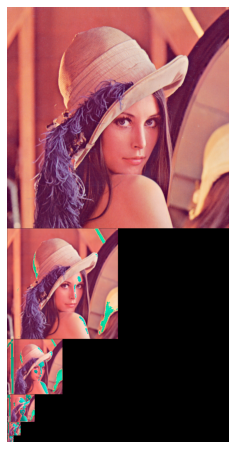

In [7]:
b,g,r = cv2.split(gPyr)
gPyr_rgb = cv2.merge((r,g,b))
plt.figure(figsize=(8, 8))
plt.imshow(gPyr_rgb.astype('uint8'))
plt.axis('off')
plt.show()

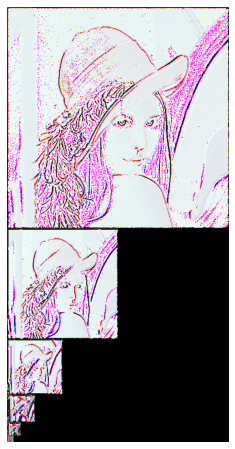

In [8]:
b,g,r = cv2.split(lPyr)
lPyr_rgb = cv2.merge((r,g,b))
plt.figure(figsize=(8, 8))
plt.imshow(lPyr_rgb.astype('uint8'))
plt.axis('off')
plt.show()

## Problem 1 b) Create a GUI to generate binary rectangular mask

Run the below code, select the starting coordinate of the mask on the pop-up window and drage while holding the left cursor and leave the cursor at the point of end coordinate of the mask.

In [9]:
import cv2

# now let's initialize the list of reference point
ref_point = []
crop = False

def shape_selection(event, x, y, flags, param):
    # grab references to the global variables
    global ref_point, crop

    # if the left mouse button was clicked, record the starting
    # (x, y) coordinates and indicate that cropping is being performed
    if event == cv2.EVENT_LBUTTONDOWN:
        ref_point = [(x, y)]

    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        ref_point.append((x, y))

        # draw a rectangle around the region of interest
        cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
        cv2.imshow("image", image)


# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser('')
#ap.add_argument("-i", "--image", required = True, help ="Path to the image")
#args = vars(ap.parse_args())

# load the image, clone it, and setup the mouse callback function
image = lena.copy()
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", shape_selection)


# keep looping until the 'q' key is pressed
while True:
    # display the image and wait for a keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()

    # if the 'c' key is pressed, break from the loop
    elif key == ord("c"):
        break

if len(ref_point) == 2:
    crop_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:
                                                           ref_point[1][0]]
    cv2.imshow("crop_img", crop_img)
    cv2.waitKey(0)

    # close all open windows
    cv2.destroyAllWindows()
mask = np.zeros(image.shape)
x = cv2.rectangle(mask,ref_point[0],ref_point[1],(255,255,255),-1)
print(ref_point)


[(143, 155), (311, 338)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


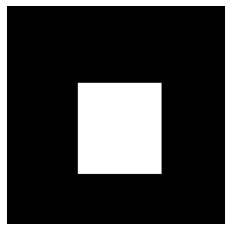

In [10]:
plt.imshow(x)
plt.axis('off')
plt.show()

In [11]:
masked_image = lena*x

## Q1 c) Image blending

Change the numbering of LA and LB to get different set of images in the folder. Have resized image to 400x400 for ease of computation and visualization

In [12]:
LA = cv2.imread('./LA_5.jpg')
LA = cv2.resize(LA,(400,400))
LA = cv2.cvtColor(LA, cv2.COLOR_BGR2GRAY)
LB = cv2.imread('./LB_5.jpg')
LB = cv2.resize(LB,(400,400))
LB = cv2.cvtColor(LB, cv2.COLOR_BGR2GRAY)

Wrote the gui for creating image mask

In [13]:
#import cv2

# now let's initialize the list of reference point
ref_point = []
crop = False

def shape_selection(event, x, y, flags, param):
    # grab references to the global variables
    global ref_point, crop

    # if the left mouse button was clicked, record the starting
    # (x, y) coordinates and indicate that cropping is being performed
    if event == cv2.EVENT_LBUTTONDOWN:
        ref_point = [(x, y)]

    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        ref_point.append((x, y))

        # draw a rectangle around the region of interest
        cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
        cv2.imshow("image", image)


# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser('')
#ap.add_argument("-i", "--image", required = True, help ="Path to the image")
#args = vars(ap.parse_args())

# load the image, clone it, and setup the mouse callback function
image = LA.copy()
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", shape_selection)


# keep looping until the 'q' key is pressed
while True:
    # display the image and wait for a keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()

    # if the 'c' key is pressed, break from the loop
    elif key == ord("c"):
        break

if len(ref_point) == 2:
    crop_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:
                                                           ref_point[1][0]]
    cv2.imshow("crop_img", crop_img)
    cv2.waitKey(0)

    # close all open windows
    cv2.destroyAllWindows()
mask = np.zeros(image.shape)
mask_LA = cv2.rectangle(mask,ref_point[0],ref_point[1],(255,255,255),-1)
print(ref_point)


[(57, 14), (340, 392)]


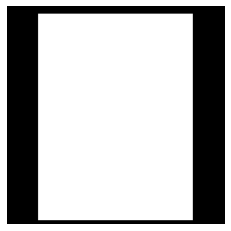

In [14]:
plt.imshow(mask_LA,cmap = 'gray')
plt.axis('off')
plt.show()

In [15]:
def image_reconstruction(gaussian_list_LA,laplacian_list_LA,laplacian_list_LB,gaussian_list_GR):
    LS = []
    for i in range(len(gaussian_list_LA)-1,-1,-1):
        flipped = (255-gaussian_list_GR[i])
        combined = (gaussian_list_GR[i]*laplacian_list_LA[i] + (flipped)*laplacian_list_LB[i])/(255*255)
        print(i)
        print(combined.shape)
        LS.append(combined)
    gaussian_combined = gaussian_list_GR[-1]*gaussian_list_LA[-1] + (255-gaussian_list_GR[-1])*gaussian_list_LB[-1]

    #reconstructed = cv2.resize(gaussian_combined,(LS[1].shape[0],LS[1].shape[1]),interpolation = cv2.INTER_NEAREST)+LS[1]
    #print(rescaled.shape)
    rescaled = []
    rescaled.append(LS[0])
    for i in range(layers):
        print(i)
        reconstructed_image = cv2.resize(rescaled[i],(LS[i+1].shape[0],LS[i+1].shape[1]),interpolation = cv2.INTER_NEAREST)
        kernel = np.array([[1,4,7,4,1]])
        conv_image_1 = conv2(reconstructed_image,np.transpose(kernel),0)
        conv_image_2 = conv2(conv_image_1,kernel,0)
        conv_image_2 = conv_image_2/273
        conv_image_2 = np.float32(conv_image_2)
        final = conv_image_2 + LS[i+1]
        rescaled.append(final)
        print(final.shape)
    print(len(rescaled))
    return rescaled[-1]

In [16]:
layers = 5

In [17]:
_,_,gaussian_list_LA,laplacian_list_LA = ComputePyr(LA, layers)

Dimensions of the padded image: (404, 400)
Dimensions of the padded image: (400, 404)
(200, 200)
Dimensions of the padded image: (204, 200)
Dimensions of the padded image: (200, 204)
(100, 100)
Dimensions of the padded image: (104, 100)
Dimensions of the padded image: (100, 104)
(50, 50)
Dimensions of the padded image: (54, 50)
Dimensions of the padded image: (50, 54)
(25, 25)
Dimensions of the padded image: (29, 25)
Dimensions of the padded image: (25, 29)
(12, 12)
Dimensions of the padded image: (29, 25)
Dimensions of the padded image: (25, 29)
Dimensions of the padded image: (54, 50)
Dimensions of the padded image: (50, 54)
Dimensions of the padded image: (104, 100)
Dimensions of the padded image: (100, 104)
Dimensions of the padded image: (204, 200)
Dimensions of the padded image: (200, 204)
Dimensions of the padded image: (404, 400)
Dimensions of the padded image: (400, 404)


In [18]:
_,_,gaussian_list_LB,laplacian_list_LB = ComputePyr(LB, layers)

Dimensions of the padded image: (404, 400)
Dimensions of the padded image: (400, 404)
(200, 200)
Dimensions of the padded image: (204, 200)
Dimensions of the padded image: (200, 204)
(100, 100)
Dimensions of the padded image: (104, 100)
Dimensions of the padded image: (100, 104)
(50, 50)
Dimensions of the padded image: (54, 50)
Dimensions of the padded image: (50, 54)
(25, 25)
Dimensions of the padded image: (29, 25)
Dimensions of the padded image: (25, 29)
(12, 12)
Dimensions of the padded image: (29, 25)
Dimensions of the padded image: (25, 29)
Dimensions of the padded image: (54, 50)
Dimensions of the padded image: (50, 54)
Dimensions of the padded image: (104, 100)
Dimensions of the padded image: (100, 104)
Dimensions of the padded image: (204, 200)
Dimensions of the padded image: (200, 204)
Dimensions of the padded image: (404, 400)
Dimensions of the padded image: (400, 404)


In [19]:
g,l,gaussian_list_GR,laplacian_list_GR = ComputePyr(mask_LA, layers)

Dimensions of the padded image: (404, 400)
Dimensions of the padded image: (400, 404)
(200, 200)
Dimensions of the padded image: (204, 200)
Dimensions of the padded image: (200, 204)
(100, 100)
Dimensions of the padded image: (104, 100)
Dimensions of the padded image: (100, 104)
(50, 50)
Dimensions of the padded image: (54, 50)
Dimensions of the padded image: (50, 54)
(25, 25)
Dimensions of the padded image: (29, 25)
Dimensions of the padded image: (25, 29)
(12, 12)
Dimensions of the padded image: (29, 25)
Dimensions of the padded image: (25, 29)
Dimensions of the padded image: (54, 50)
Dimensions of the padded image: (50, 54)
Dimensions of the padded image: (104, 100)
Dimensions of the padded image: (100, 104)
Dimensions of the padded image: (204, 200)
Dimensions of the padded image: (200, 204)
Dimensions of the padded image: (404, 400)
Dimensions of the padded image: (400, 404)


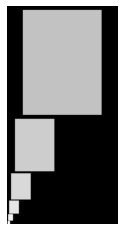

In [20]:
plt.imshow(g,cmap = 'gray')
plt.axis('off')
plt.show()

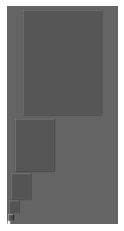

In [21]:
plt.imshow(l,cmap = 'gray')
plt.axis('off')
plt.show()

In [22]:
combined_image = image_reconstruction(gaussian_list_LA,laplacian_list_LA,laplacian_list_LB,gaussian_list_GR)

5
(12, 12)
4
(25, 25)
3
(50, 50)
2
(100, 100)
1
(200, 200)
0
(400, 400)
0
Dimensions of the padded image: (29, 25)
Dimensions of the padded image: (25, 29)
(25, 25)
1
Dimensions of the padded image: (54, 50)
Dimensions of the padded image: (50, 54)
(50, 50)
2
Dimensions of the padded image: (104, 100)
Dimensions of the padded image: (100, 104)
(100, 100)
3
Dimensions of the padded image: (204, 200)
Dimensions of the padded image: (200, 204)
(200, 200)
4
Dimensions of the padded image: (404, 400)
Dimensions of the padded image: (400, 404)
(400, 400)
6


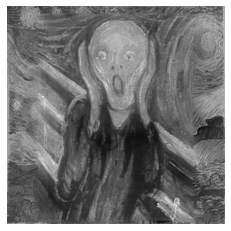

In [23]:
plt.imshow(combined_image,cmap = 'gray')
plt.axis('off')
plt.show()